# Detecção de sinais em tempo real

1 - Extrair pontos da face ou da mão <br>
2 - Treinar um modelo LSTN DL (LSTM DL Model) RNA <br>
3 - Detectar em tempo real predições <br>

## Como funciona?

1 - Coletar os pontos de um fluxo de dados <br>
2 - Treinar uma rede neural PROFUNDA com camadas de LSTM para sequencias de cenas(frames) <br>
3 - Performar a detecção dos sinais em tempo real usando OpenCV <br>

Dense: A classe Dense representa uma camada totalmente conectada, também conhecida como camada densa ou camada de feedforward. É a camada mais básica em uma rede neural, em que cada neurônio recebe entradas de todos os neurônios da camada anterior.

LSTM: A classe LSTM representa uma camada recorrente do tipo Long Short-Term Memory (LSTM). As camadas LSTM são amplamente usadas para processar sequências de dados, como texto, áudio ou séries temporais.

## Passos

01 - Importar e instalar as dependencias  <br>
02 - Mapear os pontos usando Hands  <br>
03 - Extrair os valores de pontos chave  <br>
04 - Coletar mapeamentos (keypoints) para a fase de treinamento e teste  <br>
05 - Construir e treinar uma rede LSTM  <br>
06 - Treinar o modelo  <br>
07 - Salvar métricas  <br>
08 - Rodar o script de predições  <br>



In [2]:
#!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

''

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metad

In [7]:
'''
EXEMPLO DE HANDS ANTES DE IMPLEMENTARMOS
'''

import cv2
import mediapipe as mp

# Inicialize o módulo de mãos da MediaPipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Inicialize a webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Converta a imagem para o formato RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detecte mãos na imagem
    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            # Faça algo com os pontos de referência da mão (landmarks)
            for landmark in landmarks.landmark:
                # Aqui você pode acessar as coordenadas 3D dos landmarks
                x, y, z = landmark.x, landmark.y, landmark.z

            # Desenhe os landmarks na imagem
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('Deteccao de Maos', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [8]:

cap.release()
cv2.destroyAllWindows()

In [9]:
'''
Exemplo de detecção de rostos
'''
import cv2
import mediapipe as mp

# Inicialize o módulo de detecção de rosto da MediaPipe
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

# Inicialize a webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Converta o quadro para RGB, pois o MediaPipe usa o formato RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Realize a detecção de rosto
    results = face_detection.process(frame_rgb)

    if results.detections:
        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = frame.shape
            x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
            
            # Desenhe um retângulo em volta do rosto detectado
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exiba o quadro resultante
    cv2.imshow('Deteccao de Rosto', frame)

    # Encerre o loop se a tecla 'q' for pressionada
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libere a captura e feche a janela
cap.release()
cv2.destroyAllWindows()


In [13]:
cap.release()
cv2.destroyAllWindows()

In [14]:
'''
Exemplo de detecção de corpo inteiro
'''

import cv2 #visão computacional
import numpy as np #para ajudar com arrays e para estruturação de datasets
import os #iterações com o sistema operacional
from matplotlib import pyplot as plt #visualizaão de dados
import time #para controlar as pausas entre os inputs de dados
import mediapipe as mp #criará o fluxo de dados

# Importa o módulo 'holistic' da biblioteca 'mp.solutions' que contém o modelo Holistic.
mp_holistic = mp.solutions.holistic


# Importa o módulo 'drawing_utils' da biblioteca 'mp.solutions' que contém utilitários para desenho e anotação de pontos no modelo Holistic.
mp_drawing = mp.solutions.drawing_utils


In [15]:
def mediapipe_detection(image, model):
    # Converte a imagem de BGR para RGB, pois o modelo do Mediapipe requer entradas no formato RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # CONVERSÃO DE COR BGR PARA RGB
    image.flags.writeable = False  # Torna a imagem somente leitura, pois algumas operações do modelo exigem isso.
    results = model.process(image)  # Faz a predição utilizando o modelo.
    image.flags.writeable = True  # Torna a imagem novamente gravável.
    # Converte a imagem de volta de RGB para BGR, para que possa ser exibida corretamente.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # CONVERSÃO DE COR RGB PARA BGR
    return image, results

#desenha as detecções feita pelo modelo holistic
def draw_landmarks(image, results):
    # Desenhar conexões faciais
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) 
    #precisei fazer uma correção aqui pois não existe mais a propriedade FACE_CONNECTIONS
    #linha original abaixo
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections

    # Desenhar conexões de pose
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

    # Desenhar conexões da mão esquerda
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


    # Desenhar conexões da mão direita
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)


#desenha as detecções com cores 
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    '''
    Correção aplicada aqui também / código original abaixo
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    '''
    
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
import cv2  # Importando a biblioteca OpenCV

# Inicialização da captura de vídeo. O argumento '0' indica que estamos utilizando a câmera padrão do sistema.
cap = cv2.VideoCapture(0)

# Inicializa o modelo Holistic do Mediapipe com as confianças mínimas de detecção e rastreamento definidas
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # Loop principal para exibição contínua do feed de vídeo
    while cap.isOpened():
        # O método 'cap.read()' retorna duas variáveis: 'ret' (um booleano indicando se a leitura foi bem-sucedida) e 'frame' (o quadro de vídeo capturado)
        ret, frame = cap.read()

        #trecho que fará detecções
        image, results = mediapipe_detection(frame, holistic)
        print(results, image) #modificação feita por mim
        
        #desehando as marcações detectadas na imagem
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)
        

        # Exibição do quadro de vídeo em uma janela com o título 'OpenCV Feed'
        #cv2.imshow('OpenCV Feed', frame) #linha original antes das marcações de detecção landmarks
        cv2.imshow('OpenCV Preview', image)
        

        # Espera por uma tecla ser pressionada por até 10 milissegundos.
        # Se a tecla 'q' for pressionada (representada por '0xFF == ord('q')'), o loop é interrompido.
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Libera os recursos da câmera
cap.release()

# Fecha todas as janelas abertas pelo OpenCV
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'> [[[100 101  98]
  [100 100  99]
  [100 100 100]
  ...
  [130 136 134]
  [133 135 135]
  [132 134 134]]

 [[101 101 101]
  [100 100 100]
  [100 100 100]
  ...
  [134 135 134]
  [135 135 135]
  [134 134 134]]

 [[101 101 101]
  [101 101 101]
  [100 100 100]
  ...
  [134 134 133]
  [134 134 134]
  [134 134 134]]

 ...

 [[ 35  35  35]
  [ 42  42  42]
  [ 49  49  49]
  ...
  [ 62  70  82]
  [ 62  73  83]
  [ 63  74  85]]

 [[ 40  40  40]
  [ 49  49  49]
  [ 56  56  56]
  ...
  [ 61  70  84]
  [ 60  70  83]
  [ 61  71  84]]

 [[ 40  40  40]
  [ 49  49  49]
  [ 56  56  56]
  ...
  [ 60  69  88]
  [ 60  69  88]
  [ 61  70  90]]]
<class 'mediapipe.python.solution_base.SolutionOutputs'> [[[150 152 143]
  [150 152 143]
  [151 153 144]
  ...
  [193 190 181]
  [192 189 180]
  [192 189 180]]

 [[151 153 144]
  [151 153 144]
  [151 153 144]
  ...
  [193 191 180]
  [192 190 178]
  [192 190 178]]

 [[151 153 146]
  [153 154 147]
  [153 154 147]


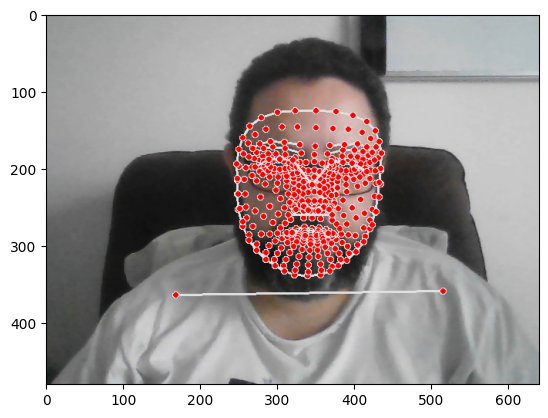

In [17]:
#Exibindo o último frame plt.imshow(frame) converti pra rgb novamente
draw_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

![Alt text](image.png)

In [19]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

# Carregue o modelo MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils  # Para desenhar os landmarks

# Inicialize a captura de vídeo
cap = cv2.VideoCapture(0)

# Lista para armazenar os dados de treinamento
X_train = []
y_train = []

def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.multi_hand_landmarks[0], mp_hands.HAND_CONNECTIONS)
    # Show to screen
    cv2.imshow('OpenCV Feed', image)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        return
    
# Função para coletar dados de treinamento
def collect_training_data(frame, label, gesture_name):
    results = hands.process(frame)  # Forneça a imagem colorida diretamente
    if results.multi_hand_landmarks:
        draw_landmarks(frame, results)
        for landmarks in results.multi_hand_landmarks:
            hand_landmarks = np.array([[lm.x, lm.y] for lm in landmarks.landmark])
            X_train.append(hand_landmarks.flatten())  # Achatando os dados
            y_train.append(label)
            print(f"Coletando dados para gesto {gesture_name}...")

# Countdown antes de cada detecção
def countdown(seconds):
    for i in range(seconds, 0, -1):
        print(f"Começando em {i}...")
        time.sleep(1)

# Coleta dados de treinamento para "polegar para baixo"
countdown(3)  # Countdown de 3 segundos antes de começar a coleta
while len(y_train) < 100:  # Coletar 100 exemplos para "polegar para baixo"
    ret, frame = cap.read()
    if not ret:
        break
    collect_training_data(frame, 0, "polegar para baixo")

# Coleta dados de treinamento para "polegar para cima"
countdown(3)  # Countdown de 3 segundos antes de começar a coleta
while len(y_train) < 200:  # Coletar 100 exemplos para "polegar para cima"
    ret, frame = cap.read()
    if not ret:
        break
    collect_training_data(frame, 1, "polegar para cima")

# Converta os dados de treinamento em arrays NumPy
X_train = np.array(X_train)
y_train = np.array(y_train)

# Normalize os valores dos pixels para o intervalo [0, 1]
X_train = X_train / 255.0

# Defina o modelo de classificação
model = keras.Sequential([
    layers.Flatten(input_shape=(X_train.shape[1],)),  # Entrada com base no número de pontos de referência
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes: polegar para baixo e polegar para cima
])

# Compile o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treine o modelo
model.fit(X_train, y_train, epochs=20)  # Ajuste o número de épocas conforme necessário

# Salve o modelo treinado
model.save('thumb_gesture_model.h5')
#thumb_gesture_model_invertido.h5

# Limpeza
cap.release()
cv2.destroyAllWindows()


Começando em 3...
Começando em 2...
Começando em 1...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados para gesto polegar para baixo...
Coletando dados

In [20]:
import cv2
import mediapipe as mp
import numpy as np
import tensorflow as tf

# Carregue o modelo MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Carregue o modelo de classificação do polegar
model = tf.keras.models.load_model('thumb_gesture_model.h5')
#thumb_gesture_model_invertido.h5

def detect_thumb_gesture(frame):
    # Converta a imagem em tons de cinza para detectar as mãos
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Converta a imagem de volta para escala de cores (BGR) para exibição
    color_frame = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Use o modelo MediaPipe para detectar as mãos na imagem em escala de cores
    results = hands.process(color_frame)

    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            # Extraia as coordenadas dos pontos de referência da mão
            hand_landmarks = np.array([[lm.x, lm.y] for lm in landmarks.landmark])
            
            # Realize a inferência do modelo de classificação do polegar
            thumb_gesture = model.predict(hand_landmarks.reshape(1, -1))[0]
            
            # Detecta se o polegar está para cima ou para baixo
            if thumb_gesture[0] > thumb_gesture[1]:
                return "Polegar para cima"
            else:
                return "Polegar para baixo"

    return "Nenhum gesto detectado"

# Abra a câmera
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    gesture = detect_thumb_gesture(frame)
    
    # Exiba o resultado na janela da câmera
    cv2.putText(frame, gesture, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Deteccao em tempo real', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 32ms/step
